In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [3]:
df_alexa=pd.read_csv("amazon_alexa.tsv",sep="\t")

In [4]:
df_alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df_alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
positive_feedback_df=df_alexa[df_alexa['feedback']==1]
negative_feedback_df=df_alexa[df_alexa['feedback']==0]

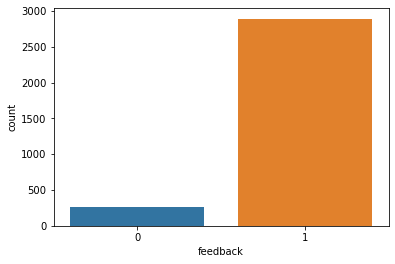

In [8]:
sns.countplot(df_alexa['feedback'],label='Count')

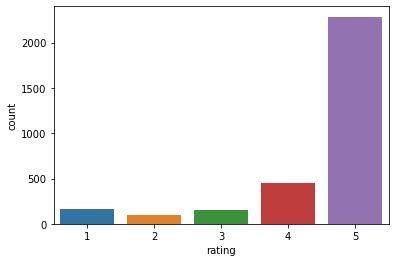

In [4]:
sns.countplot(df_alexa['rating'],label='Count')

In [5]:
df_alexa=df_alexa.drop(['date','rating'],axis=1)

In [6]:
variation_dummies=pd.get_dummies(df_alexa['variation'],drop_first=True)

In [7]:
df_alexa.drop(['variation'],axis=1,inplace=True)

In [8]:
df_alexa=pd.concat([df_alexa,variation_dummies],axis=1)

In [9]:
vectorizer=CountVectorizer()

In [10]:
alexa_countvectorizer=vectorizer.fit_transform(df_alexa['verified_reviews'])

In [16]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [13]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
df_alexa.drop(['verified_reviews'],axis=1,inplace=True)

In [12]:
encoded_reviews=pd.DataFrame(alexa_countvectorizer.toarray())

In [13]:
df_alexa=pd.concat([df_alexa,encoded_reviews],axis=1)

In [14]:
X=df_alexa.drop(['feedback'],axis=1)
y=df_alexa['feedback']

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [16]:
rf=RandomForestClassifier(n_estimators=101,criterion='entropy')

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=101)

In [21]:
y_predict_train=rf.predict(X_train)

In [18]:
y_predict=rf.predict(X_test)

In [22]:
cm=confusion_matrix(y_train,y_predict_train)

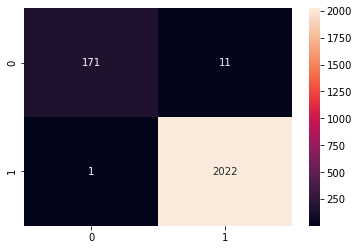

In [23]:
sns.heatmap(cm,fmt='d',annot=True)

In [24]:
cm=confusion_matrix(y_test,y_predict)

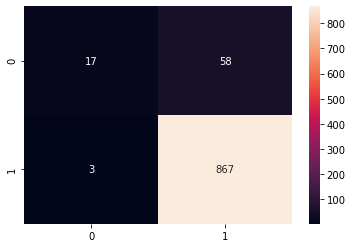

In [25]:
sns.heatmap(cm,fmt='d',annot=True)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.23      0.36        75
           1       0.94      1.00      0.97       870

    accuracy                           0.94       945
   macro avg       0.89      0.61      0.66       945
weighted avg       0.93      0.94      0.92       945



In [27]:
df_alexa=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [52]:
df_alexa=pd.concat([df_alexa,pd.DataFrame(alexa_countvectorizer.toarray())],axis=1)

In [28]:
df_alexa['length']=df_alexa['verified_reviews'].apply(len)

In [29]:
X=df_alexa.drop(['rating','date','variation','verified_reviews','feedback'],axis=1)
y=df_alexa['feedback']

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [31]:
rf=RandomForestClassifier(n_estimators=101,criterion='entropy')

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=101)

In [33]:
y_predict_train=rf.predict(X_train)

In [34]:
y_predict=rf.predict(X_test)

In [35]:
cm=confusion_matrix(y_train,y_predict_train)

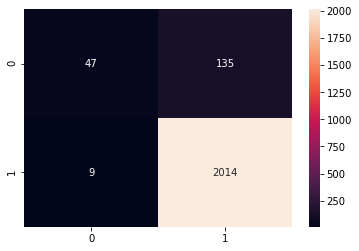

In [36]:
sns.heatmap(cm,fmt='d',annot=True)

In [37]:
cm=confusion_matrix(y_test,y_predict)

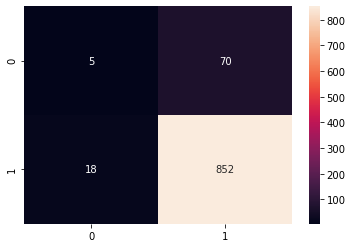

In [38]:
sns.heatmap(cm,fmt='d',annot=True)

In [39]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.22      0.07      0.10        75
           1       0.92      0.98      0.95       870

    accuracy                           0.91       945
   macro avg       0.57      0.52      0.53       945
weighted avg       0.87      0.91      0.88       945



In [5]:
variation_dummies=pd.get_dummies(df_alexa['variation'],drop_first=True)

In [6]:
df_alexa.drop(['variation'],axis=1,inplace=True)

In [7]:
df_alexa=pd.concat([df_alexa,variation_dummies],axis=1)

In [8]:
vectorizer=CountVectorizer()

In [9]:
alexa_countvectorizer=vectorizer.fit_transform(df_alexa['verified_reviews'])

In [10]:
df_alexa['length']=df_alexa['verified_reviews'].apply(len)

In [11]:
encoded_reviews=pd.DataFrame(alexa_countvectorizer.toarray())

In [12]:
df_alexa=pd.concat([df_alexa,encoded_reviews],axis=1)

In [13]:
X=df_alexa.drop(['rating','date','verified_reviews','feedback'],axis=1)
y=df_alexa['feedback']

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [15]:
rf=RandomForestClassifier(n_estimators=101,criterion='entropy')

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=101)

In [17]:
y_predict_train=rf.predict(X_train)

In [18]:
y_predict=rf.predict(X_test)

In [19]:
cm=confusion_matrix(y_train,y_predict_train)

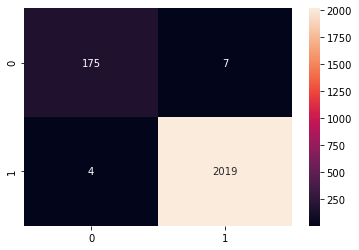

In [20]:
sns.heatmap(cm,fmt='d',annot=True)

In [21]:
cm=confusion_matrix(y_test,y_predict)

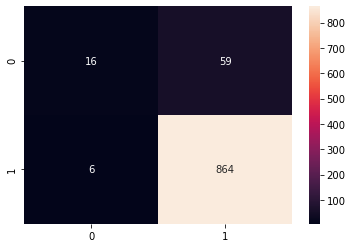

In [22]:
sns.heatmap(cm,fmt='d',annot=True)

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.21      0.33        75
           1       0.94      0.99      0.96       870

    accuracy                           0.93       945
   macro avg       0.83      0.60      0.65       945
weighted avg       0.92      0.93      0.91       945



In [19]:
# Grid Search
param_grid={
    'penalty':['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear', 'newton-cg','sag', 'saga']
}

In [20]:
log_reg=LogisticRegression(random_state=0)

In [21]:
clf=GridSearchCV(log_reg, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [22]:
best_clf=clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 53.3min finished


In [23]:
print(best_clf.best_params_)

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'newton-cg'}


In [24]:
y_predict=best_clf.predict(X_test)

In [25]:
cm=confusion_matrix(y_test, y_predict)

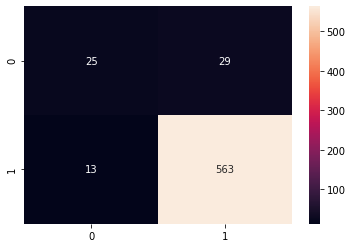

In [26]:
sns.heatmap(cm,annot=True,fmt='d')

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54        54
           1       0.95      0.98      0.96       576

    accuracy                           0.93       630
   macro avg       0.80      0.72      0.75       630
weighted avg       0.93      0.93      0.93       630

